In this notebook, we will analyze the Suicide Rates dataset and draw conclusions related to global suicide trends from 1985 to 2016.

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

Let's take a look at our dataset.

# Data preprocessing

In [9]:
df = pd.read_csv('dataset.csv')
df.sample(7)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1632,Australia,2002,male,75+ years,101,456942,22.10,Australia2002,NaN,"394,486,709,920",21474,Silent
22224,Seychelles,2001,female,15-24 years,0,7832,0.00,Seychelles2001,NaN,"622,262,057",8257,Millenials
4273,Brazil,1993,female,75+ years,33,1265590,2.61,Brazil1993,NaN,"437,798,577,640",3136,G.I. Generation
11968,Iceland,2009,female,55-74 years,1,26010,3.84,Iceland2009,NaN,"12,944,114,736",43700,Silent
2340,Azerbaijan,2004,male,15-24 years,10,851350,1.17,Azerbaijan2004,NaN,"8,680,472,169",1122,Millenials
23352,South Africa,2001,male,55-74 years,15,1671023,0.90,South Africa2001,NaN,"121,600,818,310",2953,Silent
13263,Jamaica,2001,female,55-74 years,0,136886,0.00,Jamaica2001,NaN,"9,178,016,493",3838,Silent


It is evident that our data consists of twelve independent variables which are:

- country
- year
- sex
- age
- suicides_no: number of suicides
- population
- suicides/100k pop: number of suicides per 100k population
- country-year
- HDI for year: human development index (composite measure of societal development)
- gdp_for_year: annual country GDP in dollars
- gdp_per_capita: average GDP per person in dollars 
- generation: ['Generation X', 'Silent', 'Millenials', 'Boomers', 'G.I. Generation', 'Generation Z']

Let's adjust them to our analysis.

The 'country-year' column seems unnecessary since it duplicates information already present in the separate 'country' and 'year' columns.

In [10]:
column_name_mapping = {
    'suicides/100k pop': 'suicides_per_100k',
    'HDI for year': 'HDI_for_year',
    ' gdp_for_year ($) ': 'gdp_for_year',
    'gdp_per_capita ($)': 'gdp_per_capita'
}

df.rename(columns=column_name_mapping, inplace=True)
df.drop('country-year', axis=1, inplace=True)

Let's check the number of NaN values present in each column.

In [11]:
def check_missing_values(column):
    nan_percentage = df[column].isnull().sum() / df[column].size
    print(f'"{column}" column consists of {nan_percentage:.2%} missing values.')

for column in df.columns:
    check_missing_values(column)

"country" column consists of 0.00% missing values.
"year" column consists of 0.00% missing values.
"sex" column consists of 0.00% missing values.
"age" column consists of 0.00% missing values.
"suicides_no" column consists of 0.00% missing values.
"population" column consists of 0.00% missing values.
"suicides_per_100k" column consists of 0.00% missing values.
"HDI_for_year" column consists of 69.94% missing values.
"gdp_for_year" column consists of 0.00% missing values.
"gdp_per_capita" column consists of 0.00% missing values.
"generation" column consists of 0.00% missing values.


The 'HDI_for_year' column seems to have many NaN values. 

It's not a good idea to think about 'HDI_for_year' too much. Using the mean to fill in missing values could mess up the data. 
For example: really poor countries with very low HDI would be pushed up to the mean, creating inaccurate information.

Let's leave out this column for now and come back to it later.

In [12]:
df.drop('HDI_for_year', axis=1, inplace=True)
df.sample(7)

,country,year,sex,age,suicides_no,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation
7505,Denmark,2001,female,75+ years,48,239716,20.02,"164,791,416,350",32837,Silent
26191,Ukraine,1997,male,25-34 years,1859,3444700,53.97,"50,150,399,792",1046,Generation X
25161,Thailand,2004,male,55-74 years,491,3818852,12.86,"172,895,476,153",2849,Silent
15261,Lithuania,2013,male,55-74 years,223,265835,83.89,"46,417,340,375",16538,Boomers
21437,Saint Lucia,1997,female,55-74 years,0,7376,0.00,"676,949,594",5053,Silent
13290,Jamaica,2003,male,55-74 years,0,133220,0.00,"9,399,447,609",3852,Silent
20447,Republic of Korea,2003,male,55-74 years,2239,3032808,73.83,"680,520,724,062",14971,Silent


We're all set for analysis with our data.

## Global Annual Suicides

Let's begin our analysis by visualizing the frequency of suicides committed over the years.

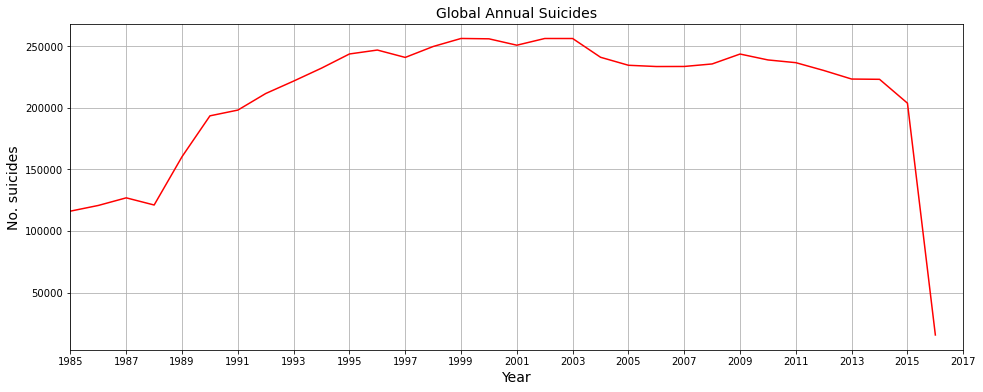

In [13]:
suicides_per_year = df.groupby('year')['suicides_no'].sum()

plt.figure(figsize=(16, 6)) 

plt.plot(suicides_per_year.index, suicides_per_year.values, color='red')

plt.xlabel('Year', fontsize=14)
plt.ylabel('No. suicides', fontsize=14)
plt.title('Global Annual Suicides', fontsize=14)

plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.show()

Looking at the given data, we can notice a few important things:
    
- There is an increasing trend in the number of suicides from 1985 to around 2000.
    
- It appears that the pattern starts to vary with occasional increases and decreases, yet the values mostly stay within a consistent range. 

- There is an extremely low value for the year 2016, which is about 13 times lower than that of 2015. This could possibly mean there's an *outlier*, or it might indicate a powerful impact from our anti-suicidal strategy.

## Suicides by Gender

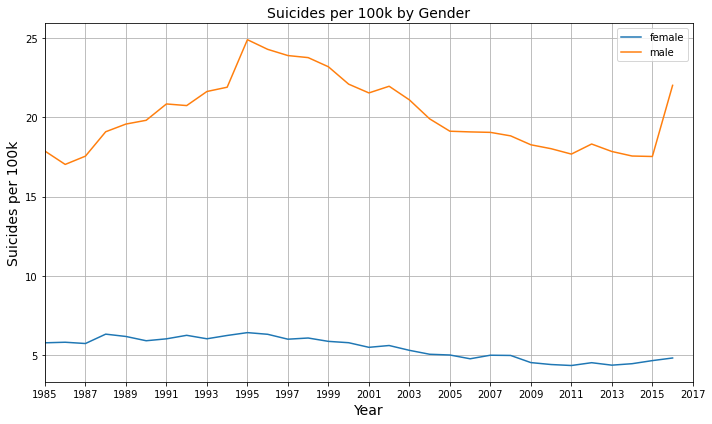

In [14]:
gender_df = df.pivot_table(index='sex', columns='year', values='suicides_per_100k', aggfunc='mean')

plt.figure(figsize=(10, 6))

for gender in gender_df.index:
    plt.plot(gender_df.columns, gender_df.loc[gender], label=gender)

plt.title('Suicides per 100k by Gender', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicides per 100k', fontsize = 14)

plt.legend()
plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.tight_layout()

plt.show()

It's clear that males are about four times more likely to commit suicide than females. 

The highest point for suicides in both genders was in 1995, followed by a decline. However, there's a worrying sign that the rates might be starting to increase again.

## Suicides by Age

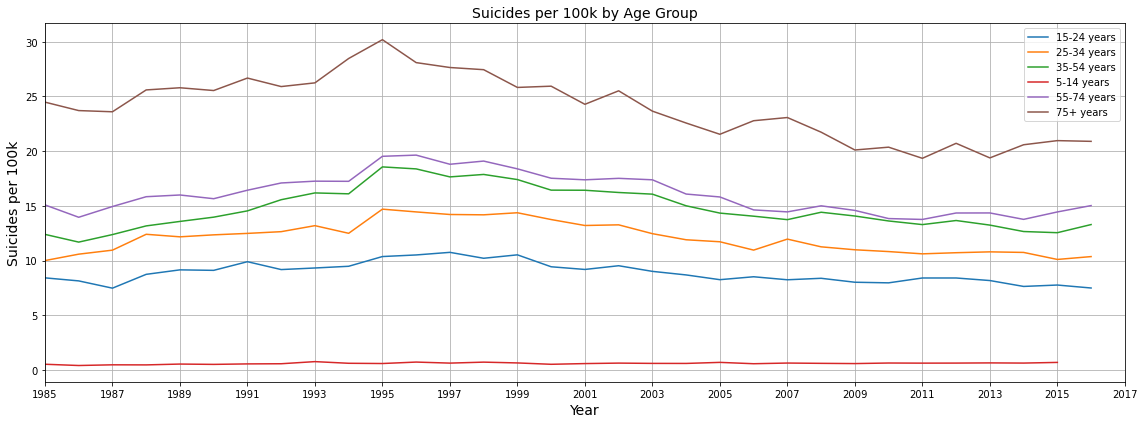

In [15]:
age_df = df.pivot_table(index='age', columns='year', values='suicides_per_100k', aggfunc='mean')

plt.figure(figsize=(16, 6))

for age_group in age_df.index:
    plt.plot(age_df.columns, age_df.loc[age_group], label=age_group)

plt.title('Suicides per 100k by Age Group', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicides per 100k', fontsize = 14)

plt.legend()
plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.tight_layout()

plt.show()

Among different age groups, those who are 75 years and older have the highest rate of suicide per 100,000 people. This means that they tend to experience suicide more often than other age groups. 

Fortunately, there seems to be a positive trend showing that overall, the frequency of these tragic events has been decreasing over the years.